### 휴먼지능정보공학과 201910787 김영서
## 13주 iris데이터 회귀분석
앞서 사용했던 iris데이터를 사용해서 회귀분석을 해보자.<br>
iris데이터는 아래 URL에서 읽어올 수 있다.
<br>
```
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

```
<br>
독립변수는 petal_length 컬럼, 종속변수는 petal_width 컬럼으로 해보자.

* (1) DataFrame 생성

* (2) 회귀선 그래프

* (3) Spark를 사용하여 회귀분석하고 계수 출력

* (4) 실제와 예측 출력

* (5) 정확성 평가하고 출력

In [1]:
import sys
import os

home=os.path.expanduser("~")
os.environ["PYSPARK_PYTHON"]="C:\\Users\\zaqxs\\Anaconda2\\envs\\py35\\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Users\\zaqxs\\Anaconda2\\envs\\py35\\python.exe"
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.9-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### (1) DataFrame 생성

In [52]:
import pandas as pd
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [53]:
irisDf.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

### (2) 회귀선 그래프

#### 독립변수, 종속변수만 남기기

In [54]:
from sklearn import linear_model
x=iris['petal_length']
y=iris['petal_width']

#### matrix inverse

In [55]:
import numpy as np
x=np.array([x,np.ones(len(x))])
x=x.T

In [56]:
x.shape
x[1]

array([1.4, 1. ])

#### w

In [57]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y)) #1이 뒤에있으니까 2번째가 w0이다

In [58]:
print("w1:{} w0:{}".format(w1,w0))

w1:0.41641913228540295 w0:-0.3665140452167348


#### yhat

In [59]:
yhat = w0*x[:,1] + w1*x[:,0]

#### gradient 이용

In [60]:
alpha = 0.002
theta=np.array(np.ones([x.shape[1]]))

In [61]:
def gradientDescent(x,y,theta,alpha,numIterations):
    for i in range(numIterations):
        #i+=1
        h=np.dot(x,theta)
        error=h-y
        cost=np.sum((h-y)**2)/len(x) #full MSE
        gradient=np.dot(x.T,error)*2/len(x) #w0,w1
        theta-=alpha*gradient
        if i%100==0:
            print("Iteration {0} | theta{1} Cost {2:.5f}".format(i,theta,cost))

    return theta

In [62]:
w1g, w0g=gradientDescent(x, y, theta, alpha, 10000) 

Iteration 0 | theta[0.93925787 0.98576   ] Cost 13.76907
Iteration 100 | theta[0.17401059 0.73508253] Cost 0.26058
Iteration 200 | theta[0.18966613 0.6619995 ] Cost 0.23261
Iteration 300 | theta[0.20469088 0.59384868] Cost 0.20822
Iteration 400 | theta[0.21872029 0.53021369] Cost 0.18696
Iteration 500 | theta[0.2318201  0.47079524] Cost 0.16842
Iteration 600 | theta[0.24405189 0.41531394] Cost 0.15226
Iteration 700 | theta[0.25547319 0.36350891] Cost 0.13817
Iteration 800 | theta[0.2661377  0.31513656] Cost 0.12589
Iteration 900 | theta[0.27609556 0.26996942] Cost 0.11517
Iteration 1000 | theta[0.2853936  0.22779513] Cost 0.10584
Iteration 1100 | theta[0.29407553 0.18841536] Cost 0.09769
Iteration 1200 | theta[0.30218219 0.15164495] Cost 0.09059
Iteration 1300 | theta[0.30975169 0.117311  ] Cost 0.08441
Iteration 1400 | theta[0.31681963 0.08525207] Cost 0.07901
Iteration 1500 | theta[0.32341923 0.05531741] Cost 0.07430
Iteration 1600 | theta[0.32958154 0.02736626] Cost 0.07020
Iteratio

#### yhat

In [63]:
yhatGV = w0g*x[:,1] + w1g*x[:,0]

#### 그래프

Text(0.5, 0, 'petal_length')

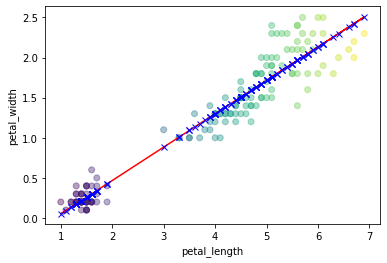

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x[:,0],y,alpha=0.4,c=iris.petal_length)
plt.plot(x[:,0],yhatGV,'r-')
plt.plot(x[:,0],yhat,'bx')
ax.set_ylabel('petal_width') 
ax.set_xlabel('petal_length')

### (3) Spark를 사용하여 회귀분석하고 계수 출력

In [65]:
irisDf =spark.createDataFrame(iris)

In [66]:
irisDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



#### 훈련, 테스트 데이터 분리

In [67]:
(trainDf, testDf) = irisDf.randomSplit([0.6, 0.4])

#### 회귀 모델링

In [68]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = ["petal_length"],outputCol = 'features')

In [69]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='petal_width', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [70]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[va,lr])

In [71]:
model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)

#### weights(계수 출력)

In [72]:
print("Coefficients: {}".format(model.stages[-1].coefficients))
print("Intercept: {:.3f}".format(model.stages[-1].intercept)) #y절편

Coefficients: [0.25618864391064006]
Intercept: 0.218


### (4) 실제와 예측 출력

In [73]:
modelTestDf=model.transform(testDf)

In [74]:
modelTestDf.select('petal_width','prediction').show(10)

+-----------+------------------+
|petal_width|        prediction|
+-----------+------------------+
|        0.1|0.4993298359523899|
|        0.2|0.5761864291255819|
|        0.2| 0.550567564734518|
|        0.3| 0.550567564734518|
|        0.2|0.6018052935166459|
|        1.0| 1.062944852555798|
|        0.2|0.5761864291255819|
|        0.2|0.5249487003434539|
|        0.3| 0.550567564734518|
|        0.2|0.5761864291255819|
+-----------+------------------+
only showing top 10 rows



#### 그래프

In [75]:
petal_l=modelTestDf.rdd.map(lambda x:x[3]).collect()
pred=modelTestDf.rdd.map(lambda x:x[6]).collect()

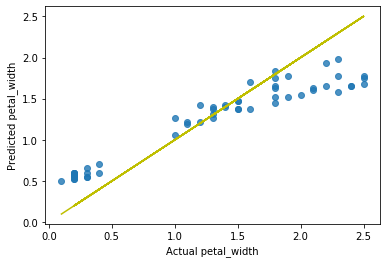

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(petal_l,pred,alpha=0.8)
ax.set_ylabel('Predicted petal_width') 
ax.set_xlabel('Actual petal_width')
ax.plot(petal_l,petal_l,'y')

### (5) 정확성 평가하고 출력

In [77]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="rmse")

In [78]:
rmse=evaluator.evaluate(modelTestDf)

In [79]:
f"Root Mean Squared Error (RMSE) on test data: {rmse:.3f}"

'Root Mean Squared Error (RMSE) on test data: 0.366'

#### $R^2$

In [80]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="r2")

In [81]:
f"r2: {evaluator.evaluate(modelTestDf):.3f}"

'r2: 0.786'